# 텐서플로우 데이터셋 TFDS
텐서플로 데이터셋 패키지를 사용하면 널리 사용되는 데이터셋을 손쉽게 다운로드할 수 있음.  
이미지 데이터셋, 텍스트 데이터셋, 오디오와 비디오 데이터셋도 포함됨.  
MNIST같은 작은 것부터 이미지넷같이 커다란 데이터셋도 있음

In [1]:
import tensorflow_datasets as tfds

In [2]:
dataset = tfds.load(name="mnist")
mnist_train, mnist_test = dataset["train"], dataset["test"]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling mnist-train.tfrecord...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling mnist-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset mnist downloaded and prepared to C:\Users\gus8c\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


일단 MNIST받는 데에도 시간이 꽤 걸림?

(32, 28, 28, 1)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


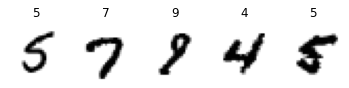

In [19]:
import matplotlib.pyplot as plt

dataset = tfds.load(name="mnist")
mnist_train, mnist_test = dataset["train"], dataset["test"]
mnist_train = mnist_train.shuffle(10000).batch(32).prefetch(1)

for item in mnist_train:
    imgs = item["image"]
    print(imgs.shape)
    labels = item["label"]
    for index in range(5):
        plt.subplot(1, 5, index + 1)
        image = imgs[index, ..., 0]
        print(image.shape)
        label = labels[index].numpy()
        plt.imshow(image, cmap="binary")
        plt.title(label)
        plt.axis("off")
    break # just showing part of the first batch

---
데이터셋에 있는 각 아이템은 특성과 레이블을 담은 딕셔너리임.  
> 하지만 케라스는 두 원소(특성과 레이블)을 담은 튜플을 기대함.  
따라서 **map()** 메서드를 사용해 데이터를 변환할 수 있음

In [20]:
dataset = tfds.load(name="mnist")
mnist_train, mnist_test = dataset["train"], dataset["test"]
mnist_train = mnist_train.shuffle(10000).batch(32)

mnist_train = mnist_train.map(lambda items: (items["image"], items["label"]))
mnist_train = mnist_train.prefetch(1)

>아니면 **as_supervised=True** 로 지정하여 **load()** 함수를 호출하는 것이 더 간단함. (물론 레이블된 데이터셋에만 적용 가능)  
또한 원하는 배치 크기도 지정할 수 있음.  
그러면 tf.keras 모델에 바로 이 데이터셋을 전달할 수 있음

In [22]:
dataset = tfds.load(name="mnist", batch_size=32, as_supervised=True)
mnist_train = dataset["train"].prefetch(1)

In [25]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Lambda(lambda images: tf.cast(images, tf.float32)),
    keras.layers.Dense(10, activation="softmax")])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [26]:
model.fit(mnist_train, steps_per_epoch=60000 // 32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 539us/step - loss: 42.7374 - accuracy: 0.8033
Epoch 2/5
1875/1875 [==============================] - 1s 434us/step - loss: 24.9358 - accuracy: 0.8696
Epoch 3/5
1875/1875 [==============================] - 1s 438us/step - loss: 24.1103 - accuracy: 0.8738
Epoch 4/5
1875/1875 [==============================] - 1s 440us/step - loss: 23.3619 - accuracy: 0.8762
Epoch 5/5
1875/1875 [==============================] - 1s 448us/step - loss: 23.0648 - accuracy: 0.8779
